# Practice Lecture 16: Training DNN
In this lab we will look at how to train Deep Neural Networks for classification and regression. \
Based on Chapter 11 from Aurelien Geron's book, Hands-on Machine Learning with Scikit-Learn Keras & Tensorflow.\
Original code examples from book in github [here](https://github.com/ageron/handson-ml2)

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/dtrad/geoml_course/blob/master/Practice16_trainingDNN.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


## Exercise 1: activation functions
Plot activation functions logit, relu and leaky-relu

In [2]:
z=np.arange(-5,5,0.1)

In [3]:
def logit(z):
    return 1 / (1 + np.exp(-z))

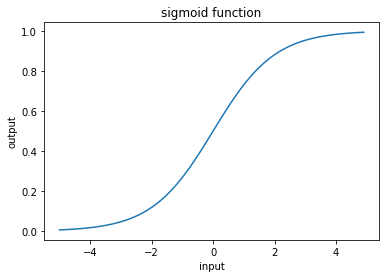

In [4]:
plt.figure()
plt.plot(z,logit(z))
plt.xlabel('input')
plt.ylabel('output')
plt.title('sigmoid function');

In [5]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

when Leaky Relu has coefficient $alpha=0$ it is the same as RELU

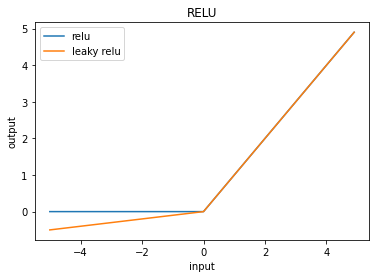

In [6]:
plt.plot(z,leaky_relu(z,0.0),label='relu')
plt.plot(z,leaky_relu(z,0.1),label='leaky relu')
plt.legend()
plt.xlabel('input')
plt.ylabel('output')
plt.title('RELU');

## Exercise 2: training for MNIST with different activation functions and initialization
Train a network for MNIST data using leaky_relu and compare with relu and sigmoid. Also compare two different initializations "he_init" and "zeros".\
For each case plot the loss and validations curves and evaluate on the test data.\
What works and what doesn't?

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

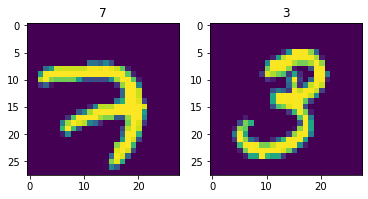

In [8]:
plt.figure()
plt.subplot(121);plt.imshow(X_train[0]);plt.title(y_train[0]);
plt.subplot(122);plt.imshow(X_train[1]);plt.title(y_train[1]);


In [9]:
dir(keras.initializers)

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [10]:
[m for m in dir(keras.initializers) if not m.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [11]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [12]:
[m for m in dir(keras.layers)]

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalM

In [13]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

2022-11-11 12:17:43.042908: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-11 12:17:48.652186: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10227 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:09:00.0, compute capability: 8.6
2022-11-11 12:17:48.719288: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 5503 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:05:00.0, compute capability: 7.5


In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

/home/dtrad/anaconda3/envs/tfgpu4/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

2022-11-11 12:17:57.113114: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 172480000 exceeds 10% of free system memory.
2022-11-11 12:17:57.427541: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 172480000 exceeds 10% of free system memory.
2022-11-11 12:17:57.664958: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-11-11 12:18:05.350380: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1719/1719 [==============================] - 11s 2ms/step - loss: 1.4996 - accuracy: 0.5934 - val_loss: 0.9193 - val_accuracy: 0.7950
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7295 - accuracy: 0.8276 - val_loss: 0.5884 - val_accuracy: 0.8522
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5356 - accuracy: 0.8623 - val_loss: 0.4727 - val_accuracy: 0.8776
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4548 - accuracy: 0.8789 - val_loss: 0.4131 - val_accuracy: 0.8908
Epoch 5/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4099 - accuracy: 0.8891 - val_loss: 0.3774 - val_accuracy: 0.8972
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3808 - accuracy: 0.8954 - val_loss: 0.3538 - val_accuracy: 0.9020
Epoch 7/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3601 - accuracy: 0.8998 - val_loss: 0.3356 - val_accuracy: 0.9064
Ep

In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3052 - accuracy: 0.9156


[0.30519476532936096, 0.9156000018119812]

In [19]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

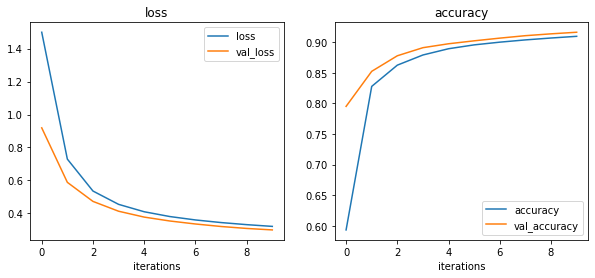

In [21]:
def plot_history(history):
    plt.figure(figsize=(10,4))
    plt.subplot(121);
    plt.plot(history.history["loss"],label='loss')
    plt.plot(history.history["val_loss"],label='val_loss')
    plt.legend()
    plt.xlabel('iterations')
    plt.title('loss')
    plt.subplot(122);
    plt.plot(history.history["accuracy"],label='accuracy')
    plt.plot(history.history["val_accuracy"],label='val_accuracy')
    plt.legend()
    plt.xlabel('iterations')
    plt.title('accuracy');
    
plot_history(history)

Let us compare with the standard RELU activation

In [22]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28,28]))
model2.add(keras.layers.Dense(300,activation="relu"))
model2.add(keras.layers.Dense(100,activation="relu"))
model2.add(keras.layers.Dense(10,activation="softmax"))

In [23]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [24]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
history2 = model2.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

2022-11-11 12:19:02.009872: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 172480000 exceeds 10% of free system memory.
2022-11-11 12:19:02.236842: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.7953 - accuracy: 0.5509 - val_loss: 1.2441 - val_accuracy: 0.7676
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9415 - accuracy: 0.8038 - val_loss: 0.7099 - val_accuracy: 0.8412
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6276 - accuracy: 0.8497 - val_loss: 0.5316 - val_accuracy: 0.8706
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5053 - accuracy: 0.8707 - val_loss: 0.4479 - val_accuracy: 0.8864
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4407 - accuracy: 0.8843 - val_loss: 0.3993 - val_accuracy: 0.8952
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4004 - accuracy: 0.8921 - val_loss: 0.3658 - val_accuracy: 0.9020
Epoch 7/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3725 - accuracy: 0.8983 - val_loss: 0.3429 - val_accuracy:

In [27]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3008 - accuracy: 0.9162


[0.3007981479167938, 0.9161999821662903]

In [26]:
print(history.params)
print(history2.params)

{'verbose': 1, 'epochs': 10, 'steps': 1719}
{'verbose': 1, 'epochs': 10, 'steps': 1719}


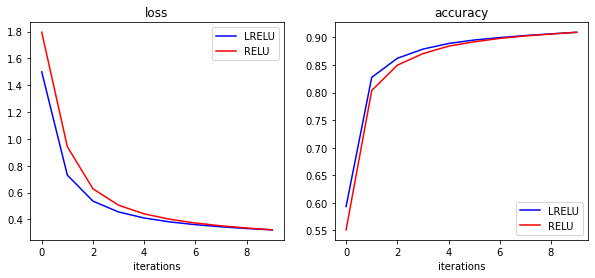

In [27]:
def plot_history(history, history2, case1, case2):
    niter=history.params['epochs']
    niter2=history.params['epochs']
    iter=np.arange(niter)
    iter2=np.arange(niter2)
    plt.figure(figsize=(10,4))
    plt.subplot(121);
    plt.plot(iter,history.history["loss"],'b-',label=case1);plt.plot(iter2,history2.history['loss'],'r-',label=case2)
    plt.xlabel('iterations')
    plt.title('loss')
    plt.legend()
    plt.subplot(122);
    plt.plot(iter,history.history["accuracy"],'b-',label=case1);plt.plot(iter2,history2.history['accuracy'],'r-',label=case2)
    plt.xlabel('iterations')
    plt.title('accuracy');
    plt.legend()
plot_history(history,history2,'LRELU','RELU')

We can see different activation functions implemented in Keras using dir(keras.activations)

In [28]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal",activation="sigmoid"),
    keras.layers.Dense(100, kernel_initializer="he_normal",activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

/home/dtrad/anaconda3/envs/tfgpu4/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [29]:
history3 = model3.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


2022-11-11 17:18:15.566713: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.3094 - accuracy: 0.1270 - val_loss: 2.2751 - val_accuracy: 0.1730
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2611 - accuracy: 0.2104 - val_loss: 2.2453 - val_accuracy: 0.3078
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2312 - accuracy: 0.3183 - val_loss: 2.2142 - val_accuracy: 0.3712
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 2.1990 - accuracy: 0.3880 - val_loss: 2.1807 - val_accuracy: 0.4696
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.1635 - accuracy: 0.4599 - val_loss: 2.1423 - val_accuracy: 0.4836
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.1237 - accuracy: 0.5018 - val_loss: 2.0994 - val_accuracy: 0.5572
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.0786 - accuracy: 0.5433 - val_loss: 2.0505 - val_accuracy:

In [30]:
model3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8618 - accuracy: 0.6496


[1.8617790937423706, 0.6496000289916992]

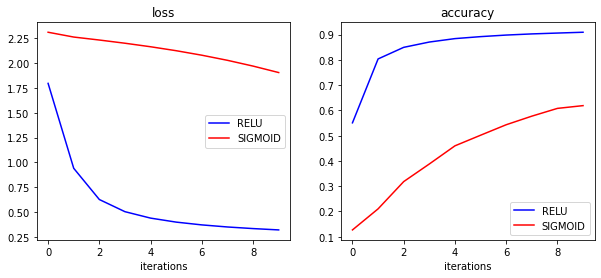

In [31]:
plot_history(history2,history3,'RELU','SIGMOID')

The same for initializers. We can check what is available by dir(keras.initializers)

In [32]:
[m for m in dir(keras.initializers) if not m.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [33]:
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="zeros",activation="sigmoid"),
    keras.layers.Dense(100, kernel_initializer="zeros",activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
history4 = model4.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
model4.evaluate(X_test,y_test)

/home/dtrad/anaconda3/envs/tfgpu4/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.3254 - accuracy: 0.1100 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 2/10
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3014 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 3/10
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3014 - accuracy: 0.1123 - val_loss: 2.3012 - val_accuracy: 0.1126
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 5/10
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3012 - accuracy: 0.1123 - val_loss: 2.3008 - val_accuracy: 0.1126
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3012 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.3012 - accuracy: 0.1123 - val_loss: 2.3003 - val_accuracy:

[2.300435781478882, 0.11349999904632568]

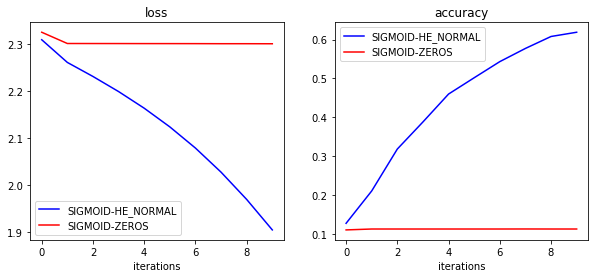

In [34]:
plot_history(history3,history4,'SIGMOID-HE_NORMAL','SIGMOID-ZEROS')

## Exercise 3: 
Use the first model with/without batch normalization. Plot the loss and accuracy curves for training and validation. Do you see any difference?
How many more parameters you need to optimize and why?

In [35]:
model5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [36]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 100)              

In [37]:
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
history5 = model5.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
model5.evaluate(X_test,y_test)

/home/dtrad/anaconda3/envs/tfgpu4/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8759 - accuracy: 0.7324 - val_loss: 0.4952 - val_accuracy: 0.8606
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4769 - accuracy: 0.8635 - val_loss: 0.3872 - val_accuracy: 0.8894
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4070 - accuracy: 0.8819 - val_loss: 0.3406 - val_accuracy: 0.9044
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3674 - accuracy: 0.8944 - val_loss: 0.3134 - val_accuracy: 0.9126
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3439 - accuracy: 0.8995 - val_loss: 0.2937 - val_accuracy: 0.9186
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3214 - accuracy: 0.9065 - val_loss: 0.2769 - val_accuracy: 0.9236
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3060 - accuracy: 0.9108 - val_loss: 0.2666 - val_accuracy:

[0.24038971960544586, 0.9319999814033508]

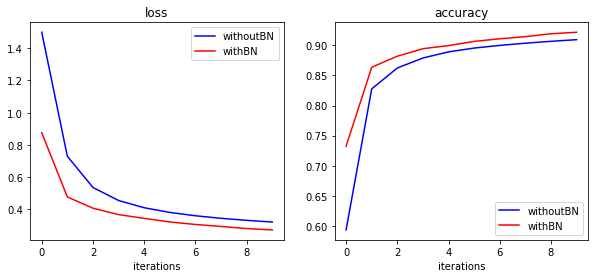

In [38]:
plot_history(history, history5, 'withoutBN','withBN')

## Exercise 4
For the fashion_mnist dataset shown below, create two different data sets A and B.
- Data set A will contain all classes except 8 and 9.
- Data set B will contain classes 8 and 9.
- Create a multiclass classification model for A.
- Create a binary classification model for B.\
For B, instead of training the network from scratch, start from the network trained for data set A. \
Replace the last layer (softmax for multiclass classification) for a sigmoid (binary classification). 

We take the full dataset first

In [39]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Now we split the data into two new data sets, A and B. \
A has 7 classes (all original classes without 8 and 9) and can be classified with multiclass methods.\
B has 2 classes (Bag is false, Ankle Boot is True).\
We will train on the model A and then use it for B.\
That is we will switch from multiclass to binary classification.

In [40]:
print(class_names[8:10])
def split_dataset(X, y):
    y_8_or_9 = (y == 8) | (y == 9) # bag or ankle boots
    y_A = y[~y_8_or_9]    
    y_B = (y[y_8_or_9] == 9).astype(np.float32) # binary classification task, 8 False, 9 True
    return ((X[~y_8_or_9], y_A),
            (X[y_8_or_9], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
print(X_train_A.shape,y_train_A.shape)
print(X_train_B.shape,y_train_B.shape)
# Select only an small portion of B.
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]
print('After selection',X_train_B.shape,y_train_B.shape)

['Bag', 'Ankle boot']
(43996, 28, 28) (43996,)
(11004, 28, 28) (11004,)
After selection (200, 28, 28) (200,)


Let us check the indexes for model A and model B to make sure we didn't make mistakes.

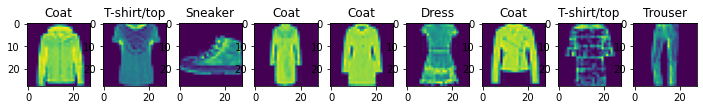

In [41]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_train_A[i]);plt.title(class_names[y_train_A[i]])

In [42]:
class_nameB=['bag','boot']

1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0


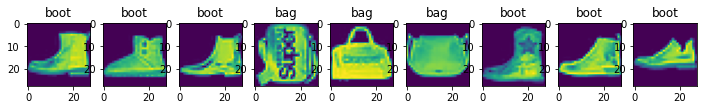

In [43]:
plt.figure(figsize=(12,6))
for i in range(9):
    print(y_train_B[i])
    plt.subplot(191+i)
    plt.imshow(X_train_B[i]);plt.title(class_nameB[np.int8(y_train_B[i])])

Now we start training model A. We build a sequential model as we did before.

In [44]:
tf.random.set_seed(42)
np.random.seed(42)

In [45]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

We train from scratch using the dataset A.

In [46]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])
historyA=model_A.fit(X_train_A,y_train_A,validation_data=(X_valid_A,y_valid_A),epochs=20)

/home/dtrad/anaconda3/envs/tfgpu4/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.7969 - accuracy: 0.7202 - val_loss: 0.5709 - val_accuracy: 0.8014
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5502 - accuracy: 0.8007 - val_loss: 0.5051 - val_accuracy: 0.8244
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5014 - accuracy: 0.8167 - val_loss: 0.4836 - val_accuracy: 0.8294
Epoch 4/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.4740 - accuracy: 0.8256 - val_loss: 0.4634 - val_accuracy: 0.8319
Epoch 5/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.4560 - accuracy: 0.8331 - val_loss: 0.4450 - val_accuracy: 0.8384
Epoch 6/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.4416 - accuracy: 0.8384 - val_loss: 0.4365 - val_accuracy: 0.8377
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.4295 - accuracy: 0.8427 - val_loss: 0.4274 - val_accuracy:

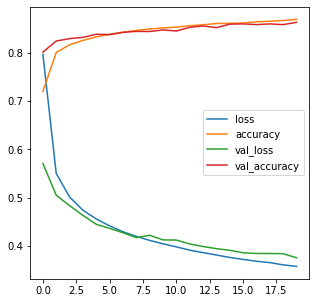

In [47]:
import pandas as pd
def plot_historypd(history):
    pd.DataFrame(history.history).plot(figsize=(5,5))
plot_historypd(historyA)    

In [48]:
model_A.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_20 (Dense)             (None, 8)                

The main part of this exercise is to train for dataset B but starting from the model trained in dataset A.\
Notice that model A has never seeing a bag or ankle boot. Let use save the model first.

In [49]:
model_A.save("my_model_A.h5")

Now we will create a new model B by using layers from modelA except for the last one (the softmax with the softmax activation) since these layer was designed for multiclasses.\
We will replace this last layer with a simpler sigmoid (as usual for binary classification).

In [50]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [51]:
for i in np.arange(len(model_A.layers)): 
    print(model_A.layers[i].name,'\t',model_B_on_A.layers[i].name)

flatten_5 	 flatten_5
dense_15 	 dense_15
dense_16 	 dense_16
dense_17 	 dense_17
dense_18 	 dense_18
dense_19 	 dense_19
dense_20 	 dense_21


We need to fix the weights for all layers except the last one we want to change.

In [52]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

/home/dtrad/anaconda3/envs/tfgpu4/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [53]:
model_B_on_A.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                

Now let us evaluate the models in the datasets A and B.\
Since model_A was already training for dataset A, it produces a good result for testA

In [54]:
model_A.evaluate(X_test_A, y_test_A)

250/250 [==============================] - 1s 3ms/step - loss: 0.4189 - accuracy: 0.8461


[0.4188789427280426, 0.8461250066757202]

The last layer of model_B_on_A has not been trained yet for dataset B. The rest of the layers are good. Let us try it to see if the last layer is important.

In [55]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 1s 4ms/step - loss: 1.4736 - accuracy: 0.3540


[1.4735904932022095, 0.3540000021457672]

Let us now train the last layer.

In [56]:
historyB = model_B_on_A.fit(X_train_B, y_train_B, epochs=10,
                           validation_data=(X_valid_B, y_valid_B))
model_B_on_A.evaluate(X_test_B, y_test_B)

Epoch 1/10
7/7 [==============================] - 1s 38ms/step - loss: 1.4442 - accuracy: 0.3500 - val_loss: 1.4205 - val_accuracy: 0.3504
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 1.3582 - accuracy: 0.3500 - val_loss: 1.3313 - val_accuracy: 0.3454
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 1.2743 - accuracy: 0.3450 - val_loss: 1.2561 - val_accuracy: 0.3444
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 1.2027 - accuracy: 0.3350 - val_loss: 1.1813 - val_accuracy: 0.3343
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 1.1320 - accuracy: 0.3400 - val_loss: 1.1176 - val_accuracy: 0.3363
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 1.0716 - accuracy: 0.3450 - val_loss: 1.0622 - val_accuracy: 0.3384
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 1.0183 - accuracy: 0.3650 - val_loss: 1.0036 - val_accuracy: 0.3414
Epoch 8/10
7/7 [===========

[0.831036388874054, 0.4205000102519989]

In [58]:
y_prob_B = model_B_on_A.predict(X_test_B)

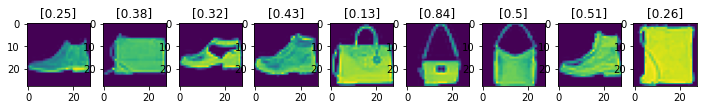

In [59]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_test_B[i]);
    plt.title(str(np.round(y_prob_B[i],2)))
    #plt.title(str(np.round(y_prob_B[i],2))+'->'+class_nameB[int(y_test_B[i])])

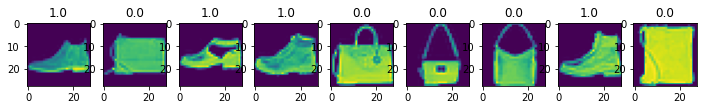

In [60]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_test_B[i]);
    plt.title((y_test_B[i]))

It looks like we need to train a bit more than just the last layer. Let us make them all layers trainable. Let us use very small learning rate.

In [61]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-4),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=10,
                           validation_data=(X_valid_B, y_valid_B))
model_B_on_A.evaluate(X_test_B, y_test_B)

Epoch 1/10
7/7 [==============================] - 1s 57ms/step - loss: 0.8335 - accuracy: 0.4150 - val_loss: 0.8361 - val_accuracy: 0.4227
Epoch 2/10
7/7 [==============================] - 0s 17ms/step - loss: 0.8061 - accuracy: 0.4600 - val_loss: 0.8108 - val_accuracy: 0.4478
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.7809 - accuracy: 0.4750 - val_loss: 0.7891 - val_accuracy: 0.4669
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.7590 - accuracy: 0.4950 - val_loss: 0.7670 - val_accuracy: 0.4950
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.7366 - accuracy: 0.5150 - val_loss: 0.7465 - val_accuracy: 0.5221
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.7154 - accuracy: 0.5400 - val_loss: 0.7276 - val_accuracy: 0.5442
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.6958 - accuracy: 0.5800 - val_loss: 0.7074 - val_accuracy: 0.5713
Epoch 8/10
7/7 [===========

[0.6301606893539429, 0.6890000104904175]

In [63]:
y_prob_B = model_B_on_A.predict(X_test_B)

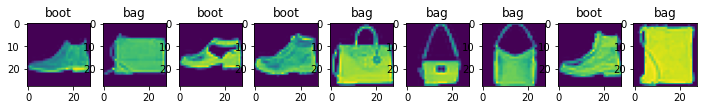

In [64]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_test_B[i]);plt.title(class_nameB[int(y_test_B[i])])

/home/dtrad/anaconda3/envs/tfgpu4/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


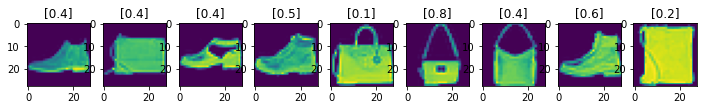

In [65]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_test_B[i]);
    #plt.title(class_nameB[int(y_pred_B[i])])
    plt.title(np.round(y_prob_B[i],1))

In [66]:
y_pred_B = model_B_on_A.predict(X_test_B[:10])
print(y_pred_B)

[[0.35510156]
 [0.39155877]
 [0.41842133]
 [0.5432374 ]
 [0.11936057]
 [0.79649204]
 [0.39884463]
 [0.6416631 ]
 [0.21987632]
 [0.46346977]]


In [67]:
y_pred_B = (model_B_on_A.predict(X_test_B[:10]))
y_pred_B = np.round(y_pred_B,0)
y_pred_B = y_pred_B.flatten()
print(y_pred_B)

[0. 0. 0. 1. 0. 1. 0. 1. 0. 0.]


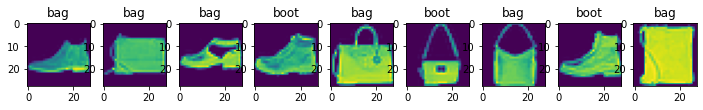

In [68]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_test_B[i]);
    plt.title(class_nameB[int(y_pred_B[i])])
    

It did the job but not clear if the original training helped at all. To evaluate that, we need to start model B from scratch (model C).

In [69]:
model_C = keras.models.Sequential()
model_C.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_C.add(keras.layers.Dense(n_hidden, activation="selu"))
model_C.add(keras.layers.Dense(1, activation="sigmoid"))

In [70]:
model_C.compile(loss="binary_crossentropy",
                 optimizer=keras.optimizers.SGD(lr=1e-3),
                 metrics=["accuracy"])
historyC = model_C.fit(X_train_B, y_train_B, epochs=10,
                  validation_data=(X_valid_B, y_valid_B))
model_C.evaluate(X_test_B, y_test_B)

Epoch 1/10
7/7 [==============================] - 1s 67ms/step - loss: 0.6796 - accuracy: 0.5850 - val_loss: 0.5316 - val_accuracy: 0.8343
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.4865 - accuracy: 0.8500 - val_loss: 0.4351 - val_accuracy: 0.9167
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3998 - accuracy: 0.8950 - val_loss: 0.3646 - val_accuracy: 0.9518
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3318 - accuracy: 0.9600 - val_loss: 0.3120 - val_accuracy: 0.9679
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2860 - accuracy: 0.9750 - val_loss: 0.2704 - val_accuracy: 0.9769
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2465 - accuracy: 0.9750 - val_loss: 0.2403 - val_accuracy: 0.9779
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2172 - accuracy: 0.9750 - val_loss: 0.2109 - val_accuracy: 0.9869
Epoch 8/10
7/7 [===========

[0.15919381380081177, 0.9860000014305115]

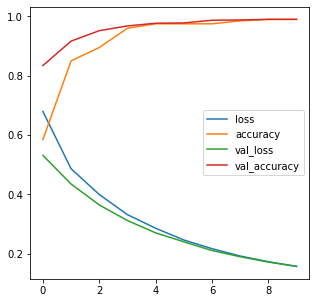

In [71]:
plot_historypd(historyC)

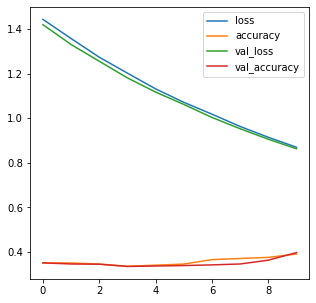

In [72]:
plot_historypd(historyB)

## Exercise 5: Optimizers
Try the classification of the fashion mnist data set using the following optimizers.

In [73]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [74]:
optimizer1 = keras.optimizers.SGD(lr=0.001, momentum=0.9)

/home/dtrad/anaconda3/envs/tfgpu4/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [75]:
optimizer2 = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [76]:
optimizer3 = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [77]:
optimizer4 = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [78]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer1, metrics=["accuracy"])

In [79]:
n_epochs = 10
history1 = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4917 - accuracy: 0.8286 - val_loss: 0.4033 - val_accuracy: 0.8626
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3778 - accuracy: 0.8668 - val_loss: 0.3723 - val_accuracy: 0.8666
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3430 - accuracy: 0.8785 - val_loss: 0.3657 - val_accuracy: 0.8746
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3187 - accuracy: 0.8868 - val_loss: 0.3464 - val_accuracy: 0.8768
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3006 - accuracy: 0.8920 - val_loss: 0.3358 - val_accuracy: 0.8776
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2850 - accuracy: 0.8976 - val_loss: 0.3411 - val_accuracy: 0.8786
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2720 - accuracy: 0.9008 - val_loss: 0.3327 - val_accuracy:

In [80]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [81]:
history4 = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4861 - accuracy: 0.8309 - val_loss: 0.3702 - val_accuracy: 0.8640
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3507 - accuracy: 0.8726 - val_loss: 0.3607 - val_accuracy: 0.8698
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8835 - val_loss: 0.3504 - val_accuracy: 0.8748
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2865 - accuracy: 0.8925 - val_loss: 0.3212 - val_accuracy: 0.8840
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.8998 - val_loss: 0.3050 - val_accuracy: 0.8914
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2460 - accuracy: 0.9075 - val_loss: 0.3652 - val_accuracy: 0.8794
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2333 - accuracy: 0.9120 - val_loss: 0.3409 - val_accuracy:

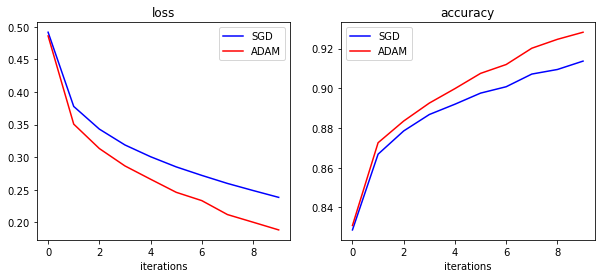

In [82]:
def plot_history(history, history2, case1, case2):
    niter=history.params['epochs']
    niter2=history.params['epochs']
    iter=np.arange(niter)
    iter2=np.arange(niter2)
    plt.figure(figsize=(10,4))
    plt.subplot(121);
    plt.plot(iter,history.history["loss"],'b-',label=case1);plt.plot(iter2,history2.history['loss'],'r-',label=case2)
    plt.xlabel('iterations')
    plt.title('loss')
    plt.legend()
    plt.subplot(122);
    plt.plot(iter,history.history["accuracy"],'b-',label=case1);plt.plot(iter2,history2.history['accuracy'],'r-',label=case2)
    plt.xlabel('iterations')
    plt.title('accuracy');
    plt.legend()
plot_history(history1,history4,'SGD','ADAM')

## Exercise 6: Learning Rate
Use the exponential rate decay defined below and compare with the previous result.\
We define a function whose job is to define another function. We do this nesting because of the parameters.

In [83]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.001, s=20)

(2, 10)


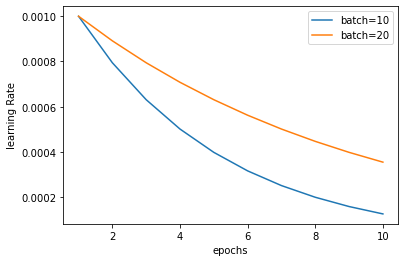

In [84]:
lr0=0.001
yy=np.zeros((2,10))
print(yy.shape)
s=[10,20]
for j in (0,1):
    exponential_decay_fn = exponential_decay(lr0,s[j])
    for i in range(10):
        yy[j,i]=(exponential_decay_fn(i))

ii=np.arange(1,11)
plt.plot(ii,yy[0,:],label='batch=10');
plt.plot(ii,yy[1,:],label='batch=20');
plt.xlabel('epochs');plt.ylabel('learning Rate')
plt.legend();


In [85]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [86]:
exponential_decay_fn = exponential_decay(lr0=0.001, s=20)

In [87]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history4b = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4999 - accuracy: 0.8365 - val_loss: 0.3614 - val_accuracy: 0.8670
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3284 - accuracy: 0.8770 - val_loss: 0.3506 - val_accuracy: 0.8754
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2855 - accuracy: 0.8928 - val_loss: 0.3208 - val_accuracy: 0.8842
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2529 - accuracy: 0.9043 - val_loss: 0.3131 - val_accuracy: 0.8882
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2234 - accuracy: 0.9156 - val_loss: 0.3003 - val_accuracy: 0.8940
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1987 - accuracy: 0.9245 - val_loss: 0.3173 - val_accuracy: 0.8918
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1770 - accuracy: 0.9332 - val_loss: 0.3194 - val_accuracy:

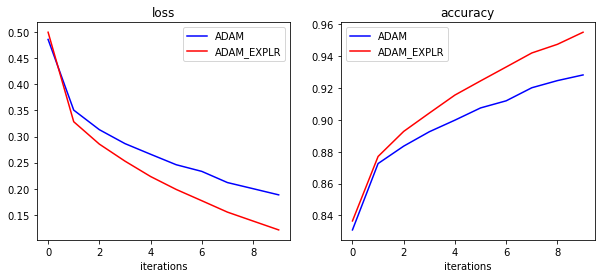

In [88]:
plot_history(history4,history4b,'ADAM','ADAM_EXPLR')

## Exercise 7: Regularization
Modify the previous network using l2 and l1 regularizations and compare with the previous result. Also compare with Dropout.

In [89]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [90]:
history5 = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4282 - accuracy: 0.8507 - val_loss: 0.3333 - val_accuracy: 0.8794
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2996 - accuracy: 0.8900 - val_loss: 0.3203 - val_accuracy: 0.8862
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2621 - accuracy: 0.9028 - val_loss: 0.3147 - val_accuracy: 0.8872
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2329 - accuracy: 0.9140 - val_loss: 0.3100 - val_accuracy: 0.8888
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2108 - accuracy: 0.9210 - val_loss: 0.2912 - val_accuracy: 0.8934
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1927 - accuracy: 0.9292 - val_loss: 0.3117 - val_accuracy: 0.8964
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1748 - accuracy: 0.9352 - val_loss: 0.3122 - val_accuracy:

In [91]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dense(10, activation="softmax",kernel_regularizer=keras.regularizers.l2(0.0001))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [92]:
history5b = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5169 - accuracy: 0.8485 - val_loss: 0.4204 - val_accuracy: 0.8756
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3854 - accuracy: 0.8866 - val_loss: 0.4122 - val_accuracy: 0.8800
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3477 - accuracy: 0.9002 - val_loss: 0.3986 - val_accuracy: 0.8796
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3208 - accuracy: 0.9095 - val_loss: 0.3792 - val_accuracy: 0.8884
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3000 - accuracy: 0.9177 - val_loss: 0.3749 - val_accuracy: 0.8922
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9234 - val_loss: 0.3963 - val_accuracy: 0.8912
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2717 - accuracy: 0.9270 - val_loss: 0.3903 - val_accuracy:

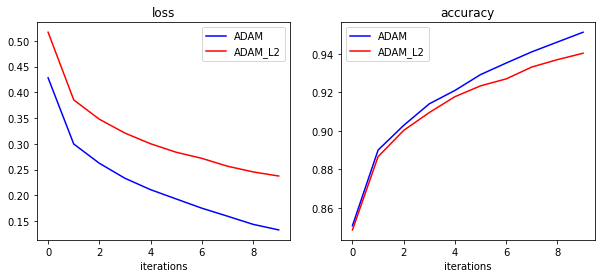

In [93]:
plot_history(history5,history5b,'ADAM','ADAM_L2')

In [94]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l1(0.0001)),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l1(0.0001)),
    keras.layers.Dense(10, activation="softmax",kernel_regularizer=keras.regularizers.l1(0.0001))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [95]:
history5c = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.3507 - accuracy: 0.8475 - val_loss: 1.0461 - val_accuracy: 0.8742
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9055 - accuracy: 0.8769 - val_loss: 0.8199 - val_accuracy: 0.8704
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7217 - accuracy: 0.8797 - val_loss: 0.6743 - val_accuracy: 0.8792
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6295 - accuracy: 0.8821 - val_loss: 0.6069 - val_accuracy: 0.8790
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5704 - accuracy: 0.8836 - val_loss: 0.5472 - val_accuracy: 0.8838
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5280 - accuracy: 0.8860 - val_loss: 0.5357 - val_accuracy: 0.8788
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4961 - accuracy: 0.8883 - val_loss: 0.5028 - val_accuracy:

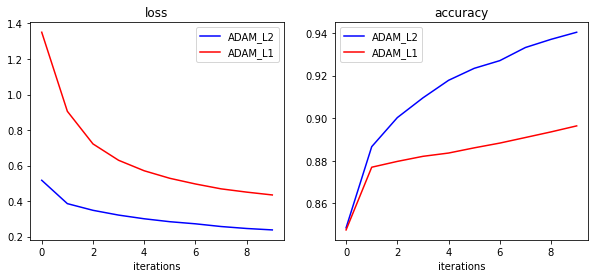

In [96]:
plot_history(history5b,history5c,'ADAM_L2','ADAM_L1')

## Exercise 8: Dropout
Compare original with regularization using dropout

In [97]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [98]:
history5d = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5715 - accuracy: 0.8085 - val_loss: 0.3563 - val_accuracy: 0.8706
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4167 - accuracy: 0.8473 - val_loss: 0.3240 - val_accuracy: 0.8800
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3766 - accuracy: 0.8609 - val_loss: 0.3227 - val_accuracy: 0.8792
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3592 - accuracy: 0.8668 - val_loss: 0.3101 - val_accuracy: 0.8864
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3423 - accuracy: 0.8724 - val_loss: 0.2967 - val_accuracy: 0.8904
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3304 - accuracy: 0.8763 - val_loss: 0.2967 - val_accuracy: 0.8886
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3163 - accuracy: 0.8819 - val_loss: 0.3024 - val_accuracy:

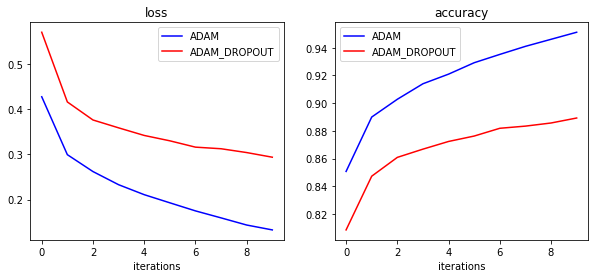

In [99]:
plot_history(history5,history5d,'ADAM','ADAM_DROPOUT')